In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv("titanic_train.csv")

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


# Visualizing the missing values using heatmap and missigno

<AxesSubplot:>

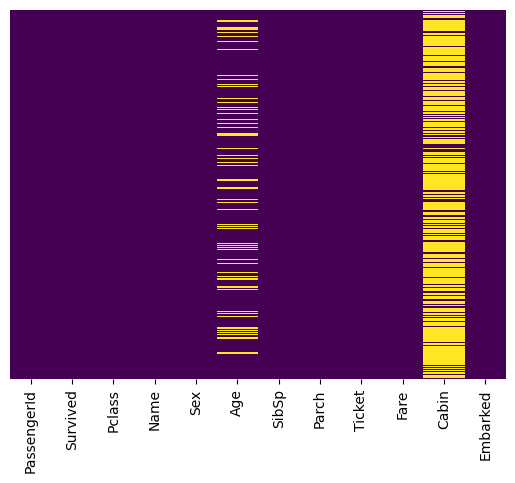

In [6]:
sns.heatmap(df.isnull(), yticklabels =False , cbar= False, cmap = "viridis")

<AxesSubplot:>

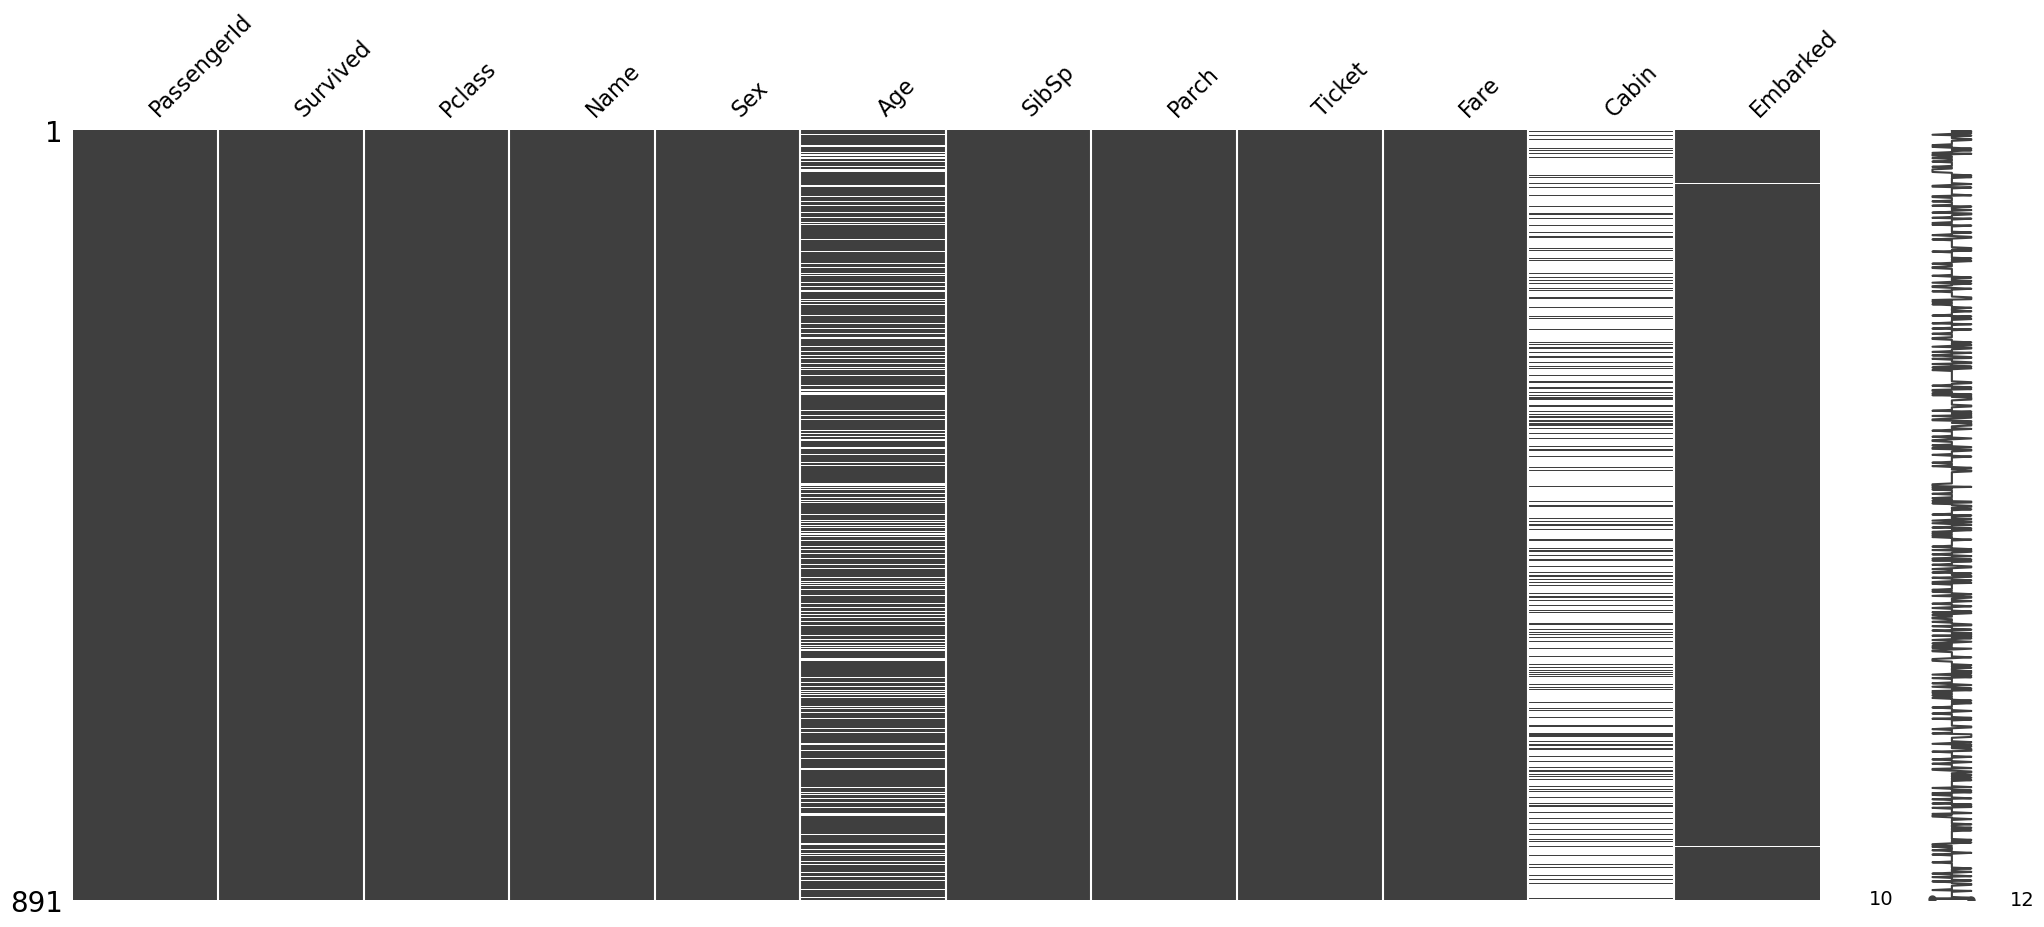

In [7]:
msno.matrix(df)

# Exploratory Analysis

In [8]:
sns.set_style("darkgrid")

<AxesSubplot:xlabel='Survived', ylabel='count'>

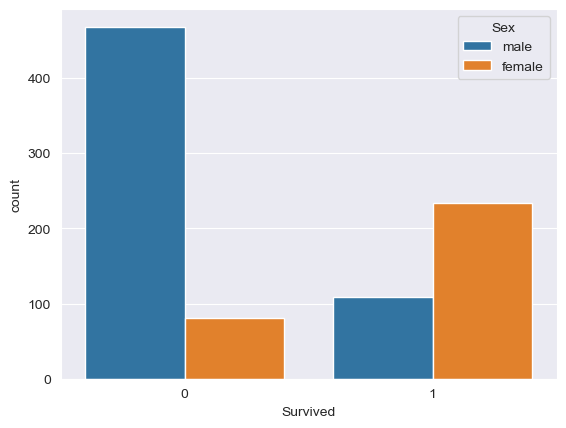

In [9]:
sns.countplot(x="Survived",hue = "Sex", data = df)

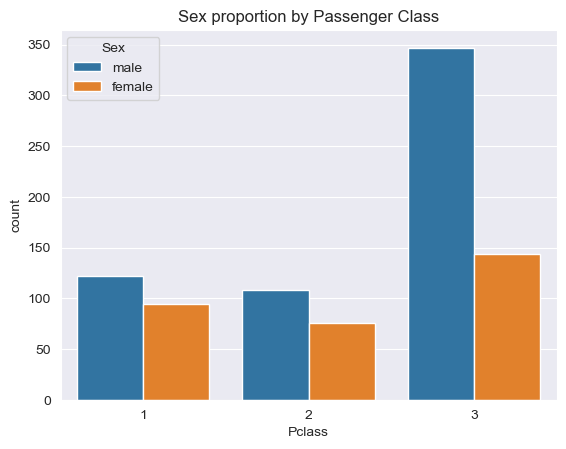

In [10]:
sns.countplot(x="Pclass",hue = "Sex", data = df)
plt.title("Sex proportion by Passenger Class")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Number of siblings and Spouses onboard stratified by gender')

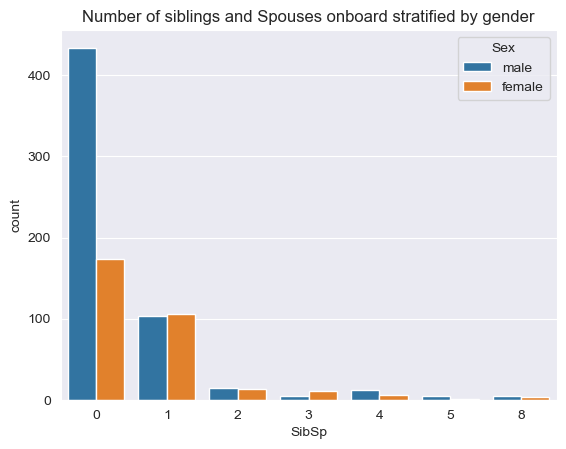

In [11]:
sns.countplot("SibSp", data = df, hue = 'Sex')
plt.title("Number of siblings and Spouses onboard stratified by gender")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare'>

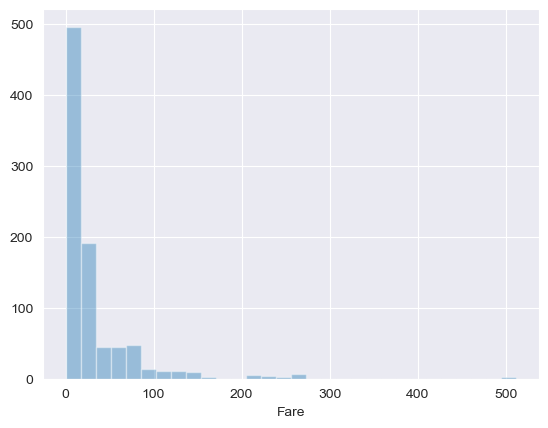

In [12]:
sns.distplot(df["Fare"], kde = False, bins = 30)

Text(0.5, 1.0, 'Age Distribution by Passenger Class')

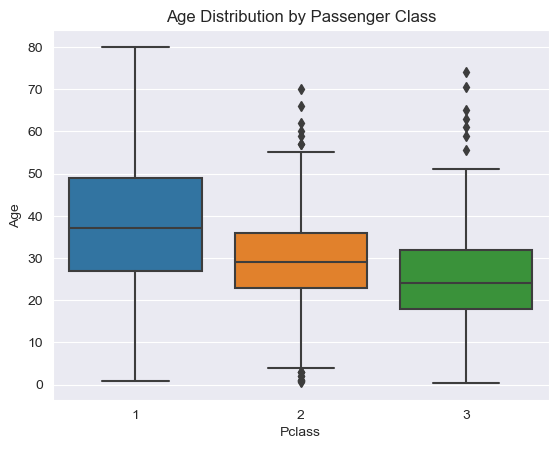

In [13]:

sns.boxplot(x="Pclass", y = "Age", data = df)
plt.title('Age Distribution by Passenger Class')

In [14]:
def impute_age(cols):
    Age = cols[0]
    Pclass= cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 29
        else:
            return 24   
    else:
        return Age

In [15]:
train = df

In [16]:
train['Age']= train[['Age','Pclass']].apply(impute_age, axis = 1)

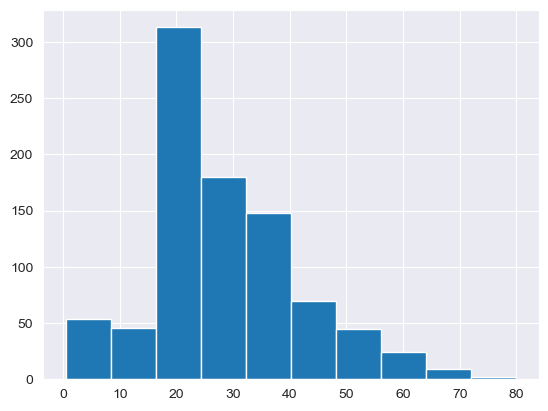

In [17]:
plt.hist(df['Age'])
plt.show()

<AxesSubplot:>

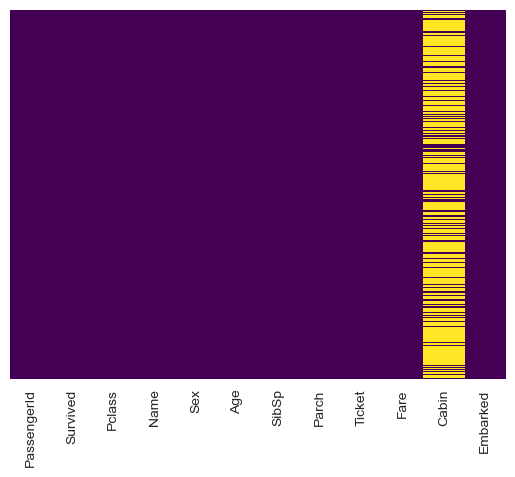

In [18]:
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap ='viridis')

In [19]:
train.drop('Cabin', axis =1, inplace = True)

In [20]:
train.dropna(inplace = True)

In [21]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [22]:
sex = pd.get_dummies(train["Sex"], drop_first = True)

In [23]:
embark = pd.get_dummies(train["Embarked"], drop_first = True)

In [24]:
train = pd.concat([train, sex, embark], axis = 1)

In [25]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [26]:
train.drop(['Sex','Embarked', 'Name','Ticket'], axis = 1, inplace = True)

In [27]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [28]:
X = train.drop(["Survived"], axis =1)
X.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1


In [29]:
y = train["Survived"]

In [30]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

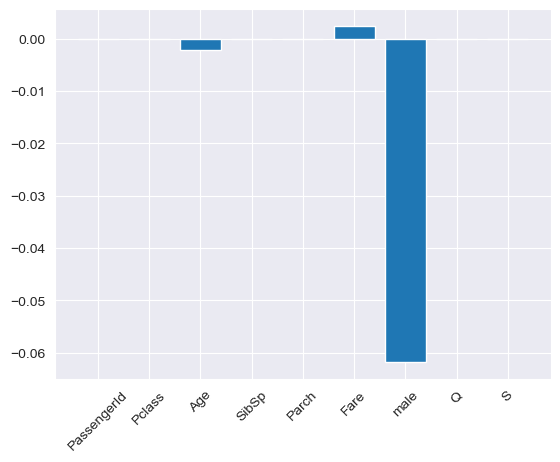

In [31]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 0.1)
lasso_coef = lasso.fit(X,y).coef_
plt.bar(X.columns, lasso_coef)
plt.xticks(rotation = 45)
plt.show()

In [32]:
#we can see that the important feature that determines the reponse variable is Sex(Male), Fare and Age

In [33]:
y_train  = train["Survived"]
X_train = train[['PassengerId','Age', 'Fare', 'male']]

In [34]:
df2 = pd.read_csv("titanic_test.csv")
df2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [35]:
df2.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [36]:
sex = pd.get_dummies(df2["Sex"], drop_first = True)

In [37]:
embark = pd.get_dummies(df2["Embarked"], drop_first = True)

In [38]:
test = pd.concat([df2, sex, embark], axis = 1)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Q,S
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0,1


Text(0.5, 1.0, 'Age Distribution by Passenger Class')

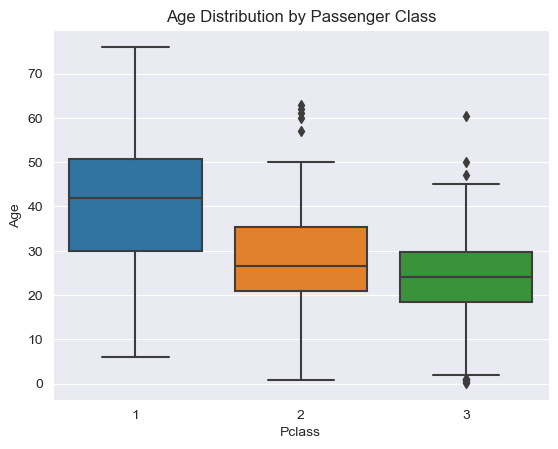

In [39]:
sns.boxplot(x="Pclass", y = "Age", data = test)
plt.title('Age Distribution by Passenger Class')

In [40]:
test = test[['PassengerId','Age', 'Fare', 'male', "Pclass"]]

In [41]:
test.shape

(418, 5)

In [42]:
def impute_age2(cols):
    Age = cols[0]
    Pclass= cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 42
        elif Pclass == 2:
            return 28
        else:
            return 24   
    else:
        return Age

test['Age']= test[['Age','Pclass']].apply(impute_age2, axis = 1)
test['Fare'] = test['Fare'].fillna(test['Fare'].mean())
test.isnull().sum()






PassengerId    0
Age            0
Fare           0
male           0
Pclass         0
dtype: int64

In [43]:
X_test = test[['PassengerId','male', 'Fare', 'Age']]


In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

In [45]:
dtree = DecisionTreeClassifier(min_samples_leaf = 0.1, random_state = 21)
logreg = LogisticRegression()
KNN = KNeighborsClassifier(n_neighbors =5)

In [46]:
classifiers = [('Logistic Regression', logreg),
               ('Classification Tree', dtree),
               ('K Nearest Neighbors', KNN)]

vc = VotingClassifier(estimators = classifiers)
vc.fit(X_train, y_train)
y_pred = vc.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduc

In [47]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [48]:
output = pd.DataFrame({'PassengerID':X_test.PassengerId, 'Survived': y_pred})
output.to_csv("submission.csv", index = False)

In [49]:
submission =pd.read_csv("submission.csv")

submission[submission['Survived'] == 1]

,PassengerID,Survived
201,1093,1
354,1246,1
